<a href="https://colab.research.google.com/github/NasimShokrgozar/FirstSc/blob/main/Session09_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [41]:
df_t=pd.read_excel('/content/Telco - classification or clustering.xls')
df_t.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


In [42]:
df_t=df_t.fillna(0)

In [43]:
X=df_t.drop('churn',axis=1)
Y=df_t['churn']

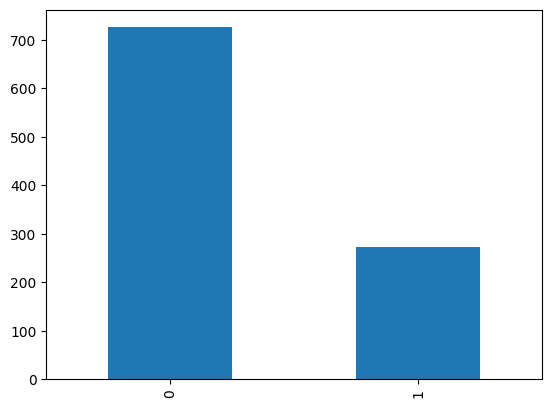

In [44]:
Y.value_counts().plot.bar()
plt.show()

In [45]:
Y.value_counts()

0    726
1    274
Name: churn, dtype: int64

In [47]:
#ارزیابی مدا با روش Holdout
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25 ,random_state=2020)

In [48]:
Ytest.value_counts()

0    174
1     76
Name: churn, dtype: int64

In [49]:
# اگوریتم naive_bayes
from sklearn.naive_bayes import GaussianNB ,MultinomialNB #1
GNB=GaussianNB()#2
GNB.fit(Xtrain,Ytrain) #3
pred=GNB.predict(Xtest) #4
pred


array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1])

In [50]:
# حال باید مدل بالا را ارزیابی کنیم
from sklearn.metrics import confusion_matrix,accuracy_score , recall_score , precision_score , f1_score , classification_report
print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred))
print(precision_score(Ytest,pred))
print(f1_score(Ytest,pred))
print(classification_report(Ytest,pred))

[[103  71]
 [ 17  59]]
0.648
0.7763157894736842
0.45384615384615384
0.5728155339805825
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       174
           1       0.45      0.78      0.57        76

    accuracy                           0.65       250
   macro avg       0.66      0.68      0.64       250
weighted avg       0.74      0.65      0.66       250



In [52]:
# در ایجا مشخص کردیم در چه کلاسی recall
# اگر پیش بینی ما بک تکست بود باید در پوز لیبل صراحتا همان تکست را بنویسیم.
print(confusion_matrix(Ytest,pred))
print(accuracy_score(Ytest,pred))
print(recall_score(Ytest,pred , pos_label=0))
print(precision_score(Ytest,pred, pos_label=0))
print(f1_score(Ytest,pred,average='macro'))
print(classification_report(Ytest,pred))

[[103  71]
 [ 17  59]]
0.648
0.5919540229885057
0.8583333333333333
0.636747903044713
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       174
           1       0.45      0.78      0.57        76

    accuracy                           0.65       250
   macro avg       0.66      0.68      0.64       250
weighted avg       0.74      0.65      0.66       250



In [62]:
df_t.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')

In [55]:
# تمرین- همین کار را برای روش دوم استفاده کنید
from sklearn.naive_bayes import GaussianNB ,MultinomialNB #1
MNB=MultinomialNB ()#2
MNB.fit(Xtrain,Ytrain) #3
pred=MNB.predict(Xtest) #4
pred

ValueError: ignored